<a href="https://colab.research.google.com/github/Metython/Metython/blob/main/data_preprocessing_tools_xyber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Importing the dataset


In [20]:
from re import X
dataset = pd.read_csv("/content/drive/MyDrive/Work_ACLEDA/Machine Learning A-Z/Part 1 - Data Preprocessing/Python/Data.csv")

# create independent variable , iloc=locate indexes 
X = dataset.iloc[:, :-1].values
# : = all rows , :-1 = all column except the last one


y = dataset.iloc[:, -1:].values 
# : = all rows , -1: = only the last column 


In [21]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [22]:
print(y)

[['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']]


## Taking care of missing data

In [23]:
# replace missing values with meaan value of that column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

## Encoding categorical data

### Encoding the Independent Variable

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0] )], remainder="passthrough" )
X = ct.fit_transform(X)

In [26]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable 

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


##Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


In [30]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [31]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [32]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [33]:
print(y_test)

[0 1]


##Feature Scaling

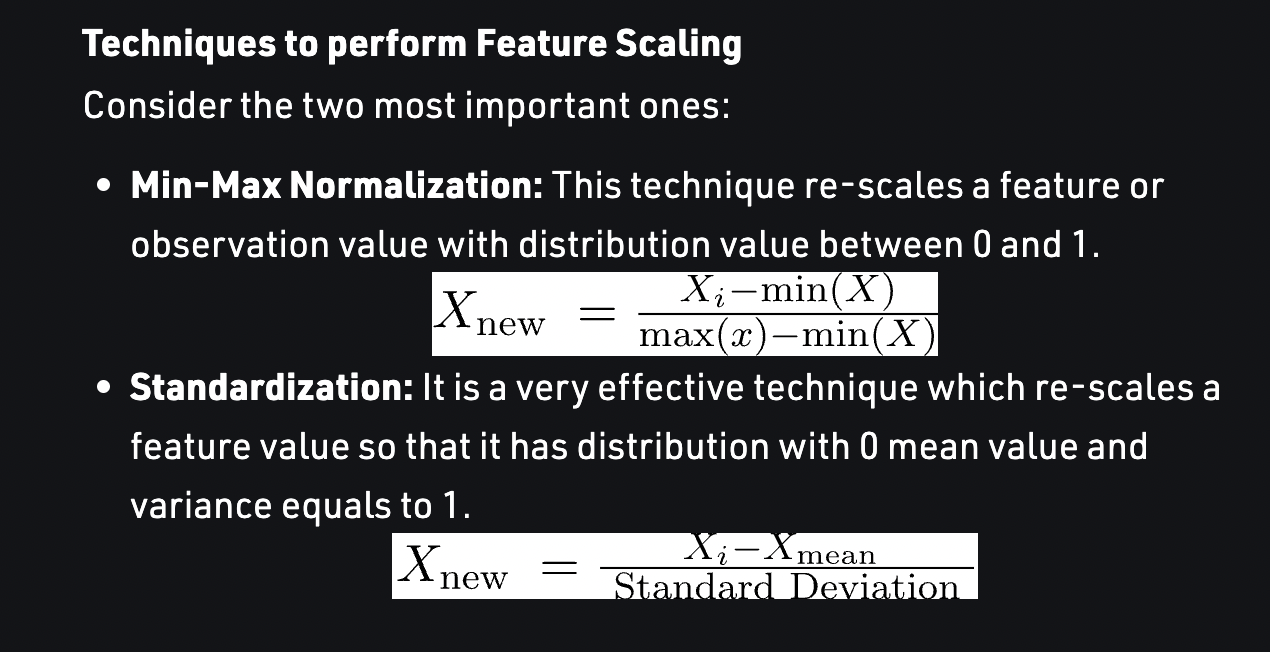

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])


In [42]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578554 -1.0781259408412427]
 [0.0 1.0 0.0 -0.014117293757057846 -0.07013167641635404]
 [1.0 0.0 0.0 0.5667085065333239 0.6335624327104546]
 [0.0 0.0 1.0 -0.3045301939022487 -0.307866172742979]
 [0.0 0.0 1.0 -1.901801144700799 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237056 1.2326533634535488]
 [0.0 1.0 0.0 1.4379472069688966 1.5749910381638883]
 [1.0 0.0 0.0 -0.7401495441200352 -0.5646194287757336]]


In [43]:
print(X_test)

[[0.0 1.0 0.0 -1.0 -1.0]
 [1.0 0.0 0.0 1.0 1.0]]
